### Import libraries

In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import sys

sys.path.append(os.path.join(os.environ['PWD'],'scripts'))

import shap

### Load data and model

In [3]:
train = pd.read_csv(os.path.join(os.environ['PWD'],'data/train.csv'))
test = pd.read_csv(os.path.join(os.environ['PWD'],'data/test.csv'))

In [4]:
X_train = train.drop('Attrition_Flag',axis=1)
y_train = train['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1}).astype('int')
X_test = test.drop('Attrition_Flag',axis=1)
y_test = test['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1}).astype('int')

In [5]:
model_path = os.path.join(os.environ['PWD'],'models/xgboost_ros.pkl')
pickle_off = open(model_path, 'rb')
model = pickle.load(pickle_off)
print('estimator unpickled successfully!')

estimator unpickled successfully!


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


### Shap values

In [6]:
Explainer = shap.TreeExplainer(model['xgb'])

In [7]:
shap_values_train = Explainer.shap_values(model['dp'].transform(X_train))

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [8]:
shap_values_test = Explainer.shap_values(model['dp'].transform(X_test))

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


### Global shape values

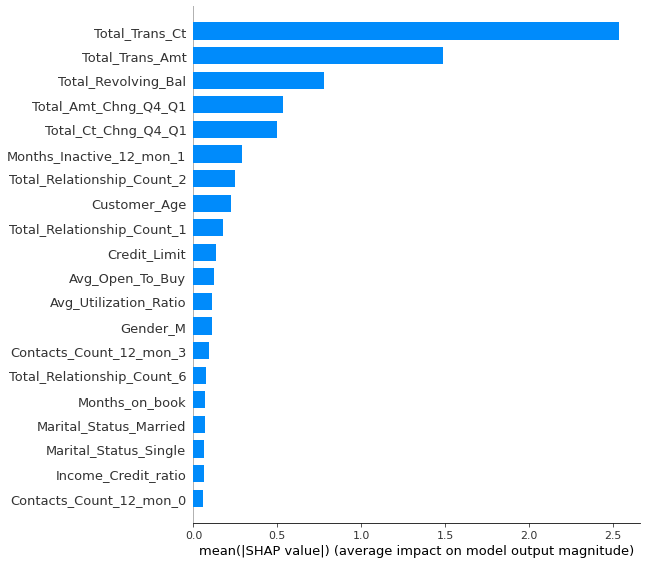

In [9]:
shap.summary_plot(shap_values_train, model['dp'].transform(X_train), feature_names=model['dp'].feature_names, plot_type="bar")

The most important variables are Total_Trans_Ct, Total_Trans_Amt and Total_Revolving_Bal.

### Shap values for feature correlation with

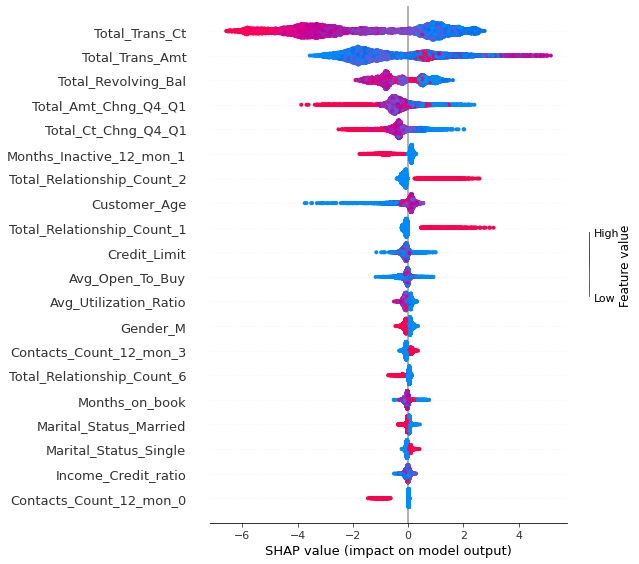

In [10]:
shap.summary_plot(shap_values_train, model['dp'].transform(X_train), feature_names=model['dp'].feature_names, plot_type="dot")

- The higher Total_Trans_Ct the less attrition probability among customers. 
- High Total_Trans_Amt indicate higher attrition.
- The higher Total_Revolving_Bal the less attrition probability among customers.

### Shap dependence plots

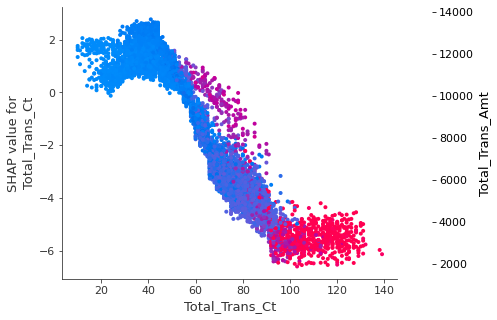

In [11]:
shap.dependence_plot('Total_Trans_Ct', shap_values_train, model['dp'].transform(X_train), 
                     feature_names=model['dp'].feature_names)

Variables are positively correlated, there is interaction between them in the middle distribution of Total_Trans_Ct.

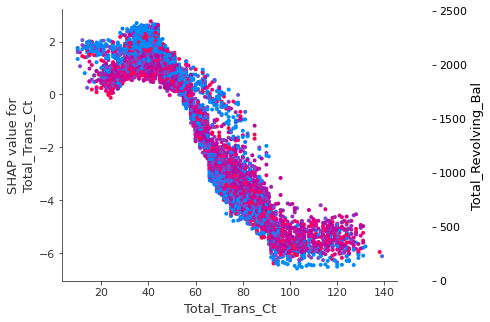

In [12]:
shap.dependence_plot('Total_Trans_Ct', shap_values_train, model['dp'].transform(X_train), 
                     feature_names=model['dp'].feature_names, interaction_index='Total_Revolving_Bal')

Variables are not correlated, there is no interaction between variables.

### Shap interactions values

In [13]:
shap_interaction_values = Explainer.shap_interaction_values(model['dp'].transform(X_train.iloc[:500,:]))

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


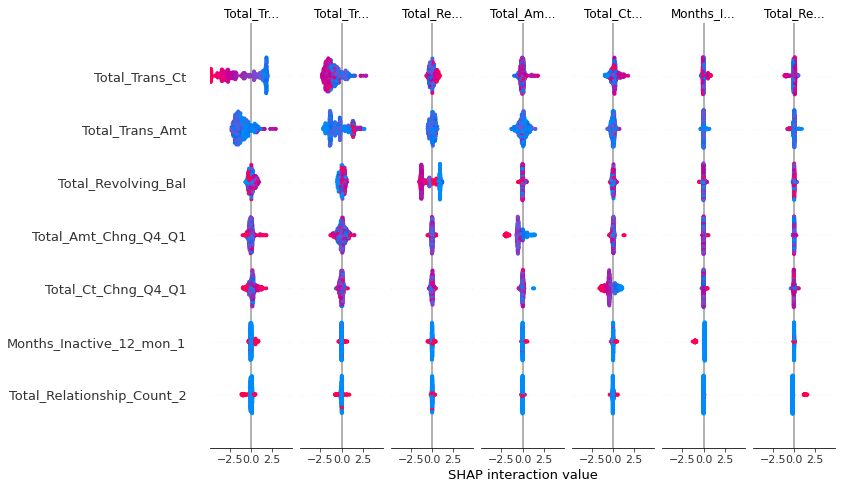

In [14]:
shap.summary_plot(shap_interaction_values, model['dp'].transform(X_train.iloc[:500,:]), 
                     feature_names=np.array(model['dp'].feature_names))

### Shap values for particular instance

In [15]:
pd.Series(model['dp'].transform(X_train).mean(axis=0)[:11],index=np.array(model['dp'].feature_names[:11]))

Customer_Age               46.350944
Months_on_book             35.933588
Credit_Limit             8621.887310
Total_Revolving_Bal      1156.191211
Avg_Open_To_Buy          7465.696099
Total_Amt_Chng_Q4_Q1        0.759395
Total_Trans_Amt          4390.670041
Total_Trans_Ct             64.760400
Total_Ct_Chng_Q4_Q1         0.712049
Avg_Utilization_Ratio       0.273354
Income_Credit_ratio         0.010204
dtype: float64

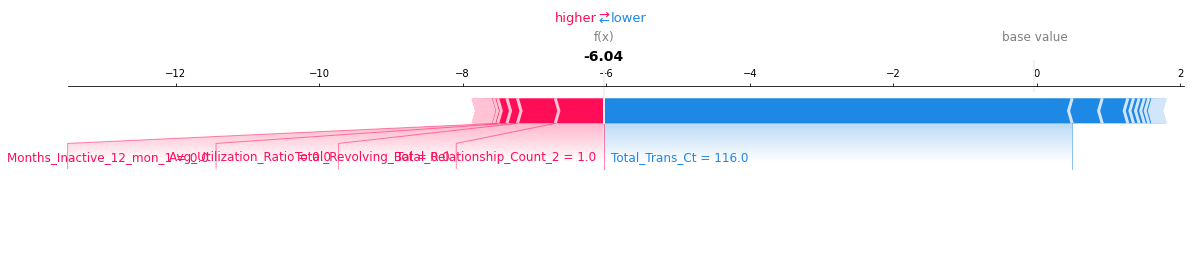

In [17]:
shap.force_plot(Explainer.expected_value, shap_values_train[:1], model['dp'].transform(X_train)[:1],
                feature_names=np.array(model['dp'].feature_names), matplotlib=True)

- Names of features are overlapping, lets draw them in other format

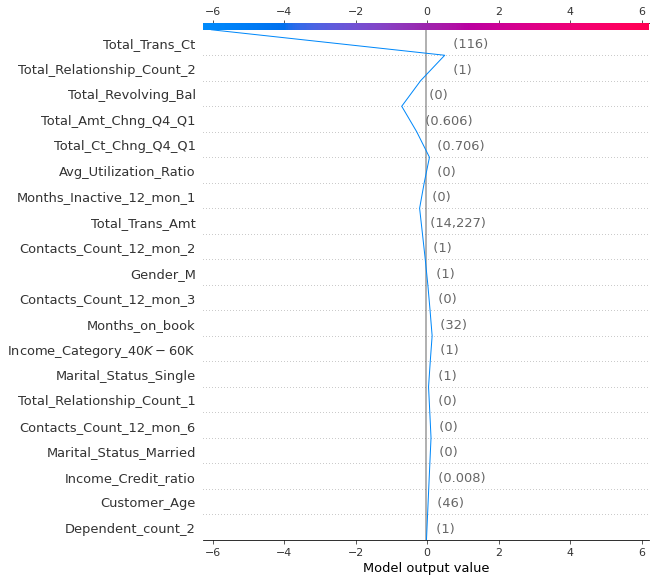

In [18]:
shap.decision_plot(Explainer.expected_value, shap_values_train[:1], model['dp'].transform(X_train)[:1],
                  feature_names=model['dp'].feature_names)

- Total_Trans_Ct lowers probability of attrition most significantly
- 2 relationship and Total_Revolving_Bal pull slighly instatnce into attriction

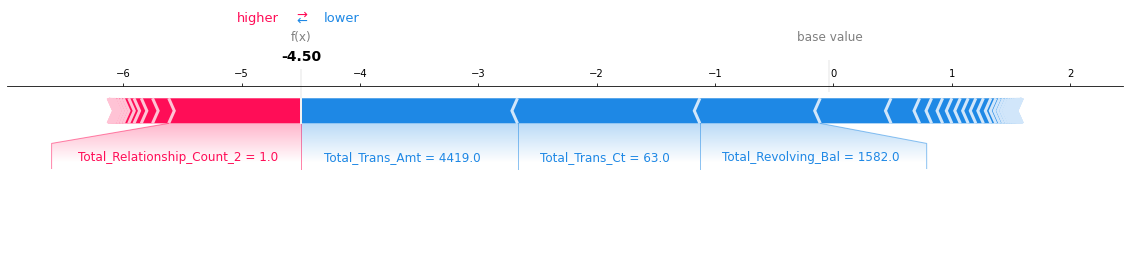

In [19]:
shap.force_plot(Explainer.expected_value, shap_values_test[:1], model['dp'].transform(X_test)[:1],
                feature_names=np.array(model['dp'].feature_names), matplotlib=True)

- Total_Trans_Amt, Total_Trans_Ct and Total_Revolving_Bal indicate low probability of attrition
- Total_Relationship_Count_2 add slightl chance for attrition

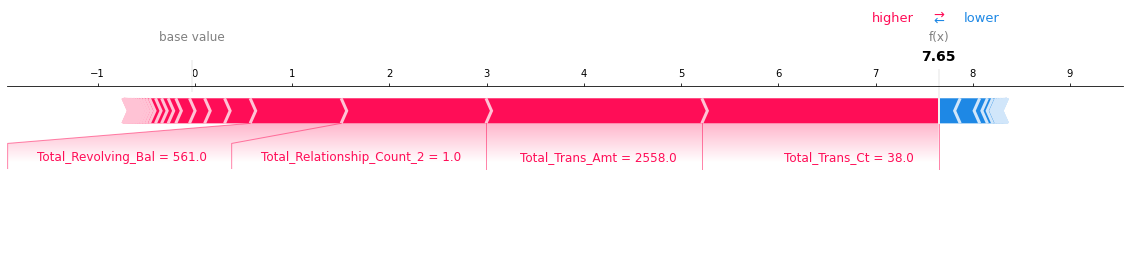

In [20]:
shap.force_plot(Explainer.expected_value, shap_values_test[2025], model['dp'].transform(X_test)[2025],
                feature_names=np.array(model['dp'].feature_names), matplotlib=True)

- Total_Trans_Amt, Total_Trans_Ct and Total_Revolving_Bal and Total_Relationship_Count_2 indicate high chance for attrition 